# 台灣同性婚姻論述中的「同性戀」

## 前情提要
我在[第二篇文章](https://collabin.netlify.com/don/taiwan-same-sex-marriage2/)中發現下福盟和伴侶盟兩個語料中，「同志」和「同性戀」兩個詞使用頻率有明顯的不同情形：

![title](s.svg)

接著我先討論「同志」一詞分別作為「複合名詞前半部」（見[第三篇文章](https://collabin.netlify.com/don/tongzhi-in-samesex-marriage-corpora/)）以及作為「動詞的主事者或受事者」（見[第四篇文章](https://collabin.netlify.com/don/tongzhi-in-samesex-marriage-corpora-2/)）的分佈情形。

關於「同志」一詞大概有了一些結果，但我的終極目標是比較「同志」和「同性戀」這一對近義詞在兩個語料中的使用差異。

## 所以...
本篇要看的是「同性戀」一詞在兩個語料中的差異。「同性戀」比起「同志」有趣的地方在於，「同性戀」在下福盟的語料中出現的頻率幾乎與「同志」出現的頻率平起平坐，但在伴侶盟的語料中，「同性戀」的出現頻率卻只有「同志」的三分之一不到。

到底什麼為什麼這個詞在兩個語料中會有那麼懸殊的比例呢？在兩個語料中究竟這個詞是如何被使用的呢？

以下仿照我在第三篇文章就已經寫好的code：匯入語料，並轉換成`nltk.text.Text()`物件。

In [2]:
import nltk
import re
import jieba
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from IPython.display import display

plt.rcParams['figure.figsize'] = [10, 5]
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/msj.ttf',size=14)
sns.set(font=myfont.get_name())

%matplotlib inline

pd.set_option('display.max_rows', 2000)

LGBTFAMILY_PATH = "line_sentence_lgbtfamily.txt"
LOVEFAMILY_PATH = "line_sentence_lovefamily.txt"

lgbtfamily_raw_text = ""
lovefamily_raw_text = ""

with open(LGBTFAMILY_PATH) as f:
    lgbtfamily_raw_text = f.read()

with open(LOVEFAMILY_PATH) as f:
    lovefamily_raw_text = f.read()
    
# 將文本拆成 list of words
lgbtfamily_word_list = [word for sentence in lgbtfamily_raw_text.split('\n') for word in sentence.split(' ')]
lovefamily_word_list = [word for sentence in lovefamily_raw_text.split('\n') for word in sentence.split(' ')]

# 轉換好後，丟入 nltk.text.Text
lovefamily_text = nltk.text.Text(lovefamily_word_list)
lgbtfamily_text = nltk.text.Text(lgbtfamily_word_list)

## 下福盟中的「同性戀」

大家可以先稍微瀏覽一下在下福盟語料中「同性戀」一詞出現的句子有哪些：

In [4]:
lovefamily_tongzhi_c = lovefamily_text.concordance_list('同性戀', width=50, lines=10000)

lovefamily_tongzhi_df = pd.DataFrame({
    "left_context": [' '.join(line.left) for line in lovefamily_tongzhi_c],
    "query": '同性戀',
    "right_context": [' '.join(line.right) for line in lovefamily_tongzhi_c],
})

lovefamily_tongzhi_df

,left_context,query,right_context
0,國家 定 有 雞姦 法 禁止 同性 肛交 另一方面 國際 間 對於,同性戀,是否 為 天生 仍多 爭論 同性 間 的 性行為 並無 增進
1,權力 約束 聯合國 成員國 在 聯合國 的 組織 裡面 的確 有 支持,同性戀,運動 的 如 日惹 原則 的 發佈 但 其他 有 主權
2,增刪 的 權利 投稿 信箱 為 了 逼 田納西州 中學 通過 有利於,同性戀,學生 社團 的 校規 同運 份子 威脅 要 破壞 學校 董事
3,與 生計 以 官司 對付 董事會 他們 先前 且 在 該校 的,同性戀,社團 集會 中 痛 敺 家長 好消息 是 越來越 多人 不
4,社團 集會 中 痛 敺 家長 好消息 是 越來越 多人 不 支持,同性戀,他們 正 挺身而出 反 嗆 發動 攻擊 的 人士 每當 田納西州
5,攻擊 的 人士 每當 田納西州 有 學校 董事會 考慮 禁止 或 撤銷,同性戀,學生 社團 時 全美 同性戀 雙性戀 和 跨性別 運動 通常 的
6,有 學校 董事會 考慮 禁止 或 撤銷 同性戀 學生 社團 時 全美,同性戀,雙性戀 和 跨性別 運動 通常 的 反應 都 是 威脅 要
7,反抗 組織 的 協助 下 法蘭克 林 中學 的 董事會 不但 阻止,同性戀,在 學校 設立 社團 且 在 打官司 上 安全 過關 該
8,在 準備 為 新 校規 進行 投票表決 這些 新 校規 足以 影響,同性戀,社團 在 學校 的 生存 因此 董事 們 和 說話 直率
9,電子郵件 與 該 董事會 聯繫 他 也 曾 在 月 日 到,同性戀,學生 社團 的 集會 發表演說 給 學生 令人 不寒 而 憟


## 伴侶盟中的「同性戀」

然後再看一下伴侶盟語料中「同性戀」一詞出現的句子又有哪些：

In [5]:
lgbtfamily_tongzhi_c = lgbtfamily_text.concordance_list('同性戀', width=50, lines=10000)

lgbtfamily_tongzhi_df = pd.DataFrame({
    "left_context": [' '.join(line.left) for line in lgbtfamily_tongzhi_c],
    "query": '同性戀',
    "right_context": [' '.join(line.right) for line in lgbtfamily_tongzhi_c],
})

lgbtfamily_tongzhi_df

,left_context,query,right_context
0,政務 次長 的 陳 明堂 的 一番 言論 明顯 恐同 他 批評,同性戀,在 精神 醫學界 認為 是 正常人 婚姻 的 殿堂 也 是
1,僅 保障 不孕症 夫妻 而 現今 夫妻 的 定義 僅限 異性戀 伴侶,同性戀,家庭 必須 透過 滴精 或者 其他 各式 方式 生 收養 孩子
2,申請 育嬰 留職停薪 假三是 台北市 政府 應 提供 所有 已 註 記,同性戀,伴侶 僱員 與 異性戀 伴侶 相同 的 福利 范雲並 呼籲 年底
3,告訴 我 女女 關係 是 不 正常 的 我 才 認識 到,同性戀,是 一個 禁忌 小時候 她 埋首 唸書 不 多 看電視 或
4,不 多 看電視 或 愛情小說 愛情 與 性別 的 概念 同樣 模糊,同性戀,這個 字 進入 了 她 的 視野 她 注意 到 教會
5,這個 字 進入 了 她 的 視野 她 注意 到 教會 對,同性戀,的 印象 十分 負面 比 其他 事情 所 背負 的 罪名
6,她 希望 男生 把 她 當成 男 生來 喜歡 她 兩者 像是,同性戀,的 關係 所以 她 無法 把 自己 視為 雙性戀 她 自己
7,書 邀集 連署 甚至 伴隨 著 邀集 連署 的 行動 加上 對於,同性戀,明顯 具有 偏見 與 敵意 的 說明 發放 連署 者 或許
8,使用 目的 並非 提供 優於 婚姻 的 保障 而是 透過 專法 把,同性戀,和 異性戀 區隔 開來 隔離 不是 真 平等 拒絕 隔離 拒簽
9,教授 畢恆達 台灣 社會 這 年來 出現 一個 劇烈 的 變化 就是,同性戀,議題 的 檯面 化 與 激烈 化 無論是 異是 同 經由


## 「同性戀」作為複合名詞的前半部

In [6]:
def generate_bigram_freq(wordlist, keyword, order=0):
    # 生成 bigrams
    bigrams = [bigram for bigram in nltk.bigrams(wordlist) if bigram[order]== keyword]
    
    # 生成 Frequency list
    fq_list = nltk.probability.FreqDist(bigrams)
    
    #
    fq_list = [(''.join(k), v, v / len(bigrams)) for (k, v) in fq_list.items()]
    
    # 由次數大到小排序
    fq_list = sorted(fq_list, key=lambda tup: tup[1], reverse=True)
    
    return fq_list

### 下福盟
#### 下福盟語料中所有「同性戀」作為Bigram前半部的詞

In [7]:
lovefamily_tongzhi_bigram_freq_right_context = pd.DataFrame(generate_bigram_freq(lovefamily_word_list, '同性戀'), columns=['詞', '次數', '次數/總數'])
lovefamily_tongzhi_bigram_freq_right_context

,詞,次數,次數/總數
0,同性戀的,212,0.152190
1,同性戀運動,81,0.058148
2,同性戀是,51,0.036612
3,同性戀文化,50,0.035894
4,同性戀行為,45,0.032304
5,同性戀生活,35,0.025126
6,同性戀性,31,0.022254
7,同性戀雙性戀,27,0.019383
8,同性戀家庭,23,0.016511
9,同性戀伴侶,22,0.015793


#### 下福盟中「同性戀」作為Bigram前半部的前20名

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

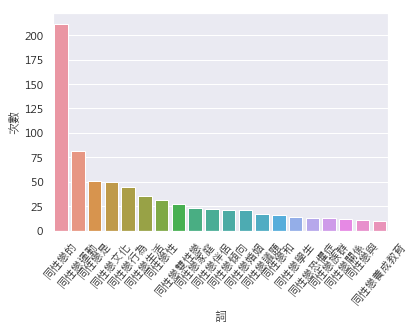

In [8]:
g = sns.barplot(x="詞", y="次數", data=lovefamily_tongzhi_bigram_freq_right_context[:20])
plt.xticks(rotation=50) 

### 伴侶盟
#### 伴侶盟語料中所有「同性戀」作為Bigram前半部的詞

In [9]:
lgbtfamily_tongzhi_bigram_freq_right_context = pd.DataFrame(generate_bigram_freq(lgbtfamily_word_list, '同性戀'), columns=['詞', '次數', '次數/總數'])
lgbtfamily_tongzhi_bigram_freq_right_context

,詞,次數,次數/總數
0,同性戀雙性戀,14,0.091503
1,同性戀家庭,10,0.065359
2,同性戀的,9,0.058824
3,同性戀傾向,7,0.045752
4,同性戀是,6,0.039216
5,同性戀在,4,0.026144
6,同性戀從,4,0.026144
7,同性戀關係,4,0.026144
8,同性戀伴侶,3,0.019608
9,同性戀議題,3,0.019608


#### 伴侶盟中「同性戀」作為Bigram前半部的前20名

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

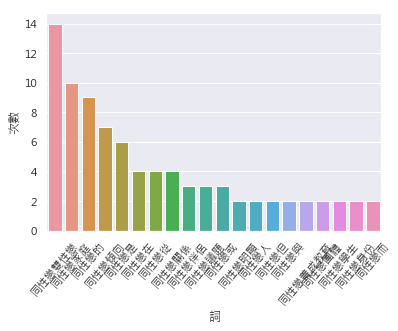

In [10]:
g = sns.barplot(x="詞", y="次數", data=lgbtfamily_tongzhi_bigram_freq_right_context[:20])
plt.xticks(rotation=50) 

In [11]:
display(lovefamily_tongzhi_df[lovefamily_tongzhi_df['right_context'].str.startswith('的')])

,left_context,query,right_context
14,同運 份子 都 戴 著 彩虹 顏色 的 花環 和 其他 象徵,同性戀,的 服飾 另一半 的 參與者 則是 當地 家長 及護家 人士 蓋斯
21,覺得 真的 是 很 難 你們 真的 很棒 然後 第四點 我要 跟,同性戀,的 朋友 說 我 真的 沒有 恨 你們 我 沒有 要
29,所 反映 的 觀點 和 價值觀 會 被 全民 採納 他們 對,同性戀,的 看法 會成 為 各 公私 機構 為 求職者 面試 時
65,高達 依據 中研院 在 年 發佈 的 研究 台灣 自認 為 是,同性戀,的 民眾僅 即便 納入 雙性戀 和 不 清楚 自己 性 傾向
70,他們 的 性 教育 大綱 因為 有 一部分 的 同性戀 需要 把,同性戀,的 權利 放進 教學大綱 裡 這 一點 我 不 反對 我們
75,資訊 向大眾 洗腦 芬蘭 全國 和 政治 領袖 一直 被 媒體 灌輸,同性戀,的 不當 觀念 真是 遺憾 第二個 問題 是 我們 在 芬蘭
95,正 不斷 企圖 藉由 絲毫 不 經過 討論 的 方式 強行 倡議,同性戀,的 婚姻家庭 觀 因此 越來越 多人 起來 反對 歐洲 已有 國
112,這類 內容 包括 地球 環境 不斷 被 毀壞 可能 帶來 浩劫 及,同性戀,的 性觀念 等 她 說 兒童 必須 感到 安全 他們 的
125,的 呢 本文 嘗試 從 生物學 心理學 及 社會學 的 角度 分析,同性戀,的 起源 問題 並 深入 檢視 一些 支持 同性戀 天生 論
139,在於 教育 下一代 含糊 的 性別 和 性觀念 以致 能 合理 接受,同性戀,的 各種 思維 同運 最後 的 戰場 早就 打 進校園 和


## 分析
以上大概是資料的部分，接下來我從中選了幾個我自己覺得有趣的發現來做分析。

### 同性戀/同志養成教育 vs. 同性戀文化 vs. 同性戀生活
在下福盟的論述中，兒童的性教育被扣上「同性戀/同志養成教育」的稱號：同性戀是一種文化，而且對他們而言，「同性戀文化」(在下福盟的語料中第四名常出現)不斷被鼓勵、被推廣，甚至被散播。同樣地，「同性戀生活」複合詞也大量出現在下福盟的語料之中（位居第六名），這個詞乍聽之下很拗口，或者說平常好像很少在其他地方使用或看到這個詞，我們看看這個詞出現的幾個句子：「並歡迎這樣的人進入同性戀生活鼓勵他們活出自我」、 「同運人士 也必須尊重不願意繼續生活在同性戀生活裡的他者，一群被邊緣化的後同性戀者」。聽起來對他們而言，「同性戀」是一種像是輕食生活、少油生活讓個體能自由選擇的一種生活方式，更有趣的是在剛剛的語料中出現了平常更少見的用語「後同性戀者」，所謂「後同性戀者」就是一開始選擇過同性戀生活、但後來決定放棄過同性戀生活的一群人。先無論在科學上同性戀的出現究竟是先天或後天，至少在下福盟的語料中，我們很清楚看到了對他們而言，「同性戀」比較像是透過後天養成教育而達致的一種生活方式，並擴及至更大的群體成為一種文化。


### 同性戀行為
另一個常出現在下福盟語料中的詞為「同性戀行為」。當我說「小明和小華正在從事同性戀行為」（或許是個不太通順的句子？），你腦海第一個浮現的畫面是什麼？同性別的小明小華牽著手在夕陽沙灘談情說愛？同性別的小明小華正在進行一個性交的動作？「同性戀行為」這個詞在下福盟的語料中，在所有以同性戀為首的複合詞中位居第五名最常出現的寶座，但到底什麼是「同性戀行為」？或者，什麼又是「異性戀行為」？換個角度問，如果所有的動作都是一種行為的話，什麼時候我們會特別在動作後面加上「行為」這個詞？「行為」這個名詞涉及了將動作給名物化(nominalization)的過程，平常描述一個動作我們不會特別需要將動作給名物化，我們說「小明在教室裡吃飯」，而不會說「小明正在從事一個在教室裡吃飯的行為」。但當我們想要針對小明在吃飯的動作作出評論時，我們才會加上「行為」，把整個動作變成一個對象：「小明在教室裡吃飯的行為引發討論/被老師發現」或者「他可以接受/他不喜歡小明在教室裡吃飯的行為」。我利用中文詞彙網路小組所開發的[中文詞彙速描系統(Word Sketch System)](http://wordsketch.ling.sinica.edu.tw/)，想看看「行為」一詞在語法關係上常常與哪些詞彙共現：
![行為一詞於中研院平衡語料庫中的詞彙速描關係](xingwei.png)
有趣的是，「行為」可以是與思想/觀念/態度相對的中性詞語，但在大部分的情況，某種行為之所以成為行為常常是與「違反」、「違背」某種規則相關連的，「行為」也常常是受爭議的、暴力的、嚴重的，甚至「同性戀行為」也顯著地出現在二三十年前的平衡語料庫當中。透過這個詞彙速描系統，我們看見了「行為」一詞的色調：能夠是無色無味的、單純扮演語法上名物化的功能，也能扮演著左右讀者對該行為評價的指針。

### 同性戀 / 異性戀 / 雙性戀
我還發現在兩邊的語料中，「同性戀」這個詞常常用在與「異性戀」或「雙性戀」的並置當中，例如「把同性戀和異性戀區分開來」、「同性戀伴侶和異性戀伴侶」和「把同性戀、雙性戀劃上等號」等等。或許這是由於中文喜愛對偶的特性所導致的，也就是在並列詞語時，我們似乎傾向使用相同字數的詞（如果有的話），例如，我就會覺得說「高個子和矮個子」比說「高個子和矮子」來得通順（剛好目前中文裡沒有「高子」的說法）。因此，當我們想將homosexuality拿來與異性戀或雙性戀做比較時，我們傾向使用也是三字詞而且形式上只差第一個字的「同性戀」，而不是二字詞且沒有任何相同字的「同志」。這時候的「同性戀」似乎就是比較中性的用法，同時這也是「同性戀」與「同志」的一個使用上的差別。（當然上面我說的中文喜歡使用對偶的說法需要更嚴謹的證明。）

# 小結與反省
每次在探索語料的時候，都能看到很多有趣的發現，同時也能學習到很多新詞彙的新用法。當然我們無法從一段文字的用字遣詞毫無缺失地推斷到作者的內心狀態（信念、想法、信仰），但我們常常是運用這兩者之間的相關性去回推一個擁有什麼樣信念的人會「傾向」使用什麼樣的文字。如果說同性戀真如同婚姻制度、宗教信仰、文化節慶等等是經由後天所養成的生活方式、而非先天給定無法改變的話，那麼我們還是可以繼續追問，究竟這樣的生活方式好不好，或者這樣的文化對那些主張同性戀不應納入婚姻制度人來說究竟錯在哪裡？

同性戀一詞從最早作為疾病化的術語、作為指涉某一種異於普通異性戀的反常行為，到現在作為一種生活、方式、社群乃至一種認同，我們看到的是同一個詞語在時間軸上的語意變形，這樣的變化反映著社會思想、觀念與價值觀的變化。而即便共時地來看，在同一個台灣社會中，還是存在著各種殊異對立的立場，我作為一個身處其中的分析者，好像不太可能以上帝視角來客觀地檢視兩造立場的概念，或者這也不是我原先的目的。所以我在檢視語料的過程中，不斷問自己我作為分析者的立場到底要踩著什麼樣的戰鬥位置。我突然想起以前讀到莊子時很喜歡的一段：

> 即使我與若辯矣，若勝我，我不若勝，若果是也，我果非也邪？我勝若，若不吾勝，我果是也，而果非也邪？其或是也，其或非也邪？其俱是也，其俱非也邪？我與若不能相知也，則人固受其黮暗，吾誰使正之？使同乎若者正之，既與若同矣，惡能正之？使同乎我者正之，既同乎我矣，惡能正之？使異乎我與若者正之，既異乎我與若矣，惡能正之？使同乎我與若者正之，既同乎我與若矣，惡能正之。然則我與若與人俱不能相知也，而待彼也邪？《莊子》〈齊物論〉

以下是摘自這個[部落格](http://blog.sina.com.cn/s/blog_4e5035b501008aov.html)的中譯：

> 假使我與你辯論，你勝了我，我沒有勝你，你果真是正確的，我果真是錯誤的嗎？我勝了你，你沒有勝我，我果真是正確的，而你果真是錯誤的嗎？或者我們之間有一人是正確的，有一人是錯誤的嗎？或兩個都正確，兩個都錯誤嗎？我與你都無法知道啊，世人固然智暗無明，我又能讓誰來作公正的評定？讓同意你觀點的來評判，既然與你的觀點相同，怎麽能作公平的評判呢？讓與我觀點相同的來評判，既然與我觀點相同，怎麽能作公平的評判呢？讓與我和你觀點都不同的人來評判，既然與我和你的觀點都不同，怎麽能作公平的評判呢？讓與我和你觀點都一樣的人來評判，既然與我和你觀點都相同，怎麽能作公平的評判呢？既然這樣，我與你，與大家都無法知道啊，而還要等待誰來評判嗎？

在爭辯誰對誰錯之前，或許我應該做的是先去好好了解兩邊的人到底在想什麼，或者更誠實的說，先去好好了解那些我所不同意的立場的人到底在想什麼。